Для инвестирования 5 млн руб. и cтавки купона, равного 20% разработайте внебиржевой опцион “Autocallable” с ежеквартальным купоном и возможностью досрочного автоматического погашения опциона каждые 3 месяца, если на ежеквартальную купонную дату текущая цена бумаги с наибольшим снижением относительно своей первоначальной стоимости (worst-of performance) превышает или равна барьеру отзыва.

Если продукт не был отозван досрочно, и на последнюю купонную дату текущая цена worst of превышает или равна барьеру поставки, то продукт погашается с выплатой 100% номинала. Иначе, если хотя бы один базовый актив опциона оказался ниже барьера поставки, то осуществляется выплата денежных средств в сумме, равной эквиваленту «поставки бумаги», бумаги с наибольшим снижением относительно своей первоначальной стоимости, по ее первоначальной цене.

В корзину включить четыре базовых актива, первоначальную стоимость определить на день, предшествующий дате запуска (100%). Установить барьер отзыва 105%, купонный барьер 98%, барьер поставки 90% в процентах от первоначальной стоимости каждого базового актива корзину.

**Дата запуска:** 27-07-2022.

**Дата погашения:** 25-07-2023.

**Даты ежеквартальных наблюдений:** 25-10-2022, 25-01-2023, 25-04-2023.

1. Определить действия на купонные даты (выплачивается купон; выплачивается купон с досрочным погашением продукта; не выплачивается, но запоминается; выплачивается купон за текущий и предыдущие кварталы; производится погашение продукта с «эффектом поставки»).
1. Вычислить финансовый результат по состоянию на 25-04-2023,
определить бумагу с наибольшим снижением относительно своей первоначальной стоимости.
1. Привести иллюстративные графики, на которых отобразить бумагу с наибольшим снижением относительно своей первоначальной стоимости (worst-of performance), купонные даты и действия в эти даты, уровни барьеров отзыва, поставки и купонного барьера, первоначальную стоимость актива,
провести исследование влияния уровней барьеров (барьер отзыва, купонный барьер, барьер поставки) на финансовый результат.
1. Повторить расчеты для метода оценки базовых активов -- средневзвешенная динамика стоимости всех активов (average-of perfomance).

[Примеры графиков и расчетов.](https://www.open-broker.com/files/Presentation_OTC-Option_Autocallable_.pdf)


In [5]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

In [14]:
tickers = ['AAPL', 'TSLA', 'RIVN', 'M']
initial_date = datetime(2022, 7, 26)
observation_dates = [
    datetime(2022, 10, 25),
    datetime(2023, 1, 25),
    datetime(2023, 4, 25),
    datetime(2023, 7, 25)
]

def get_closest_close_price(ticker, target_date):
    try:
        start_date = target_date - timedelta(days=7)
        end_date = target_date + timedelta(days=7)
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)
        
        if data.empty:
            return None, None
  
        data.index = pd.to_datetime(data.index).tz_localize(None)
        target_date = target_date.replace(tzinfo=None)
        
        closest_date = min(data.index, key=lambda d: abs(d - target_date))
        close_price = data.loc[closest_date, 'Close']
        
        if isinstance(close_price, pd.Series):
            close_price = close_price.iloc[0]
        
        return closest_date, close_price
    except Exception as e:
        print(f"Ошибка для тикера {ticker}: {e}")
        return None, None


initial_prices = {}
print("Получение начальных цен:")

for ticker in tickers:
    actual_date, close_price = get_closest_close_price(ticker, initial_date)
    if close_price is not None:
        initial_prices[ticker] = close_price
        print(f"{ticker}: {close_price:.2f} USD (Дата: {actual_date.date()})")
    else:
        print(f"Не удалось получить данные для {ticker}.")


Получение начальных цен:
AAPL: 151.60 USD (Дата: 2022-07-26)
TSLA: 258.86 USD (Дата: 2022-07-26)
RIVN: 31.69 USD (Дата: 2022-07-26)
M: 16.79 USD (Дата: 2022-07-26)


In [15]:
prices_data = {'Date': observation_dates}

for ticker in tickers:
    prices = []
    for obs_date in observation_dates:
        actual_date, close_price = get_closest_close_price(ticker, obs_date)
        if close_price is not None:
            prices.append(close_price)
            print(f"{ticker} - {obs_date.date()}: {close_price:.2f} USD (Дата: {actual_date.date()})")
        else:
            prices.append(None)
            print(f"Не удалось получить цену")
    prices_data[ticker] = prices

prices_df = pd.DataFrame(prices_data)
prices_df.set_index('Date', inplace=True)

print("\nЦены на даты наблюдений:")
print(prices_df)

AAPL - 2022-10-25: 152.34 USD (Дата: 2022-10-25)
AAPL - 2023-01-25: 141.86 USD (Дата: 2023-01-25)
AAPL - 2023-04-25: 163.77 USD (Дата: 2023-04-25)
AAPL - 2023-07-25: 193.62 USD (Дата: 2023-07-25)
TSLA - 2022-10-25: 222.42 USD (Дата: 2022-10-25)
TSLA - 2023-01-25: 144.43 USD (Дата: 2023-01-25)
TSLA - 2023-04-25: 160.67 USD (Дата: 2023-04-25)
TSLA - 2023-07-25: 265.28 USD (Дата: 2023-07-25)
RIVN - 2022-10-25: 34.49 USD (Дата: 2022-10-25)
RIVN - 2023-01-25: 18.69 USD (Дата: 2023-01-25)
RIVN - 2023-04-25: 12.00 USD (Дата: 2023-04-25)
RIVN - 2023-07-25: 25.35 USD (Дата: 2023-07-25)
M - 2022-10-25: 20.57 USD (Дата: 2022-10-25)
M - 2023-01-25: 23.38 USD (Дата: 2023-01-25)
M - 2023-04-25: 16.33 USD (Дата: 2023-04-25)
M - 2023-07-25: 16.12 USD (Дата: 2023-07-25)

Цены на даты наблюдений:
                  AAPL        TSLA       RIVN          M
Date                                                    
2022-10-25  152.339996  222.419998  34.490002  20.570000
2023-01-25  141.860001  144.429993  18.

In [16]:
investment_amount = 5_000_000 
annual_coupon_rate = 0.20
quarterly_coupon = annual_coupon_rate / 4
autocall_barrier = 1.05    
coupon_barrier = 0.98      
delivery_barrier = 0.90   
assets = tickers
performance_df = prices_df.copy()

In [17]:
for asset in assets:
    performance_df[f'{asset}_Perf'] = performance_df[asset] / initial_prices[asset]

performance_df['Worst_Perf'] = performance_df[[f'{asset}_Perf' for asset in assets]].min(axis=1)

performance_df['Coupon_Paid'] = False
performance_df['Accumulated_Coupons'] = 0.0
performance_df['Early_Redeemed'] = False
performance_df['Redemption_Value'] = 0.0
performance_df['Redemption_Date'] = pd.NaT

accumulated_coupons = 0.0
early_redeemed = False

for idx, row in performance_df.iterrows():
    if early_redeemed:
        continue

    if row['Worst_Perf'] >= autocall_barrier:
        accumulated_coupons += quarterly_coupon
        performance_df.at[idx, 'Coupon_Paid'] = True
        performance_df.at[idx, 'Early_Redeemed'] = True
        performance_df.at[idx, 'Redemption_Value'] = investment_amount + (accumulated_coupons * investment_amount)
        performance_df.at[idx, 'Redemption_Date'] = idx
        early_redeemed = True
        print(f"Опцион погашен досрочно на дату {idx.date()}. Выплата: {investment_amount + (accumulated_coupons * investment_amount):,.2f} RUB")
        continue

    if row['Worst_Perf'] >= coupon_barrier:
        accumulated_coupons += quarterly_coupon
        performance_df.at[idx, 'Coupon_Paid'] = True
        print(f"Выплата купона на дату {idx.date()}: {quarterly_coupon * 100:.2f}%")
    
    performance_df.at[idx, 'Accumulated_Coupons'] = accumulated_coupons

In [18]:
final_date = observation_dates[-1]

if not early_redeemed:
    final_perf = performance_df.loc[final_date, 'Worst_Perf']
    
    if final_perf >= delivery_barrier:
        redemption_value = investment_amount
        print(f"На дату погашения {final_date.date()} опцион погашен с выплатой номинала: {investment_amount:,.2f} RUB")
    else:
        worst_asset_perf = performance_df.loc[final_date, [f'{asset}_Perf' for asset in assets]]
        worst_asset = worst_asset_perf.idxmin().replace('_Perf', '')
        worst_perf = performance_df.loc[final_date, 'Worst_Perf']
        redemption_value = investment_amount * worst_perf
        print(f"На дату погашения {final_date.date()} опцион не погашен полностью. Выплата: {redemption_value:,.2f} RUB (Худший актив: {worst_asset})")
    
    performance_df.at[final_date, 'Redemption_Value'] = redemption_value
    performance_df.at[final_date, 'Redemption_Date'] = final_date

На дату погашения 2023-07-25 опцион не погашен полностью. Выплата: 3,999,684.44 RUB (Худший актив: RIVN)


In [19]:
if early_redeemed:
    total_payout = performance_df.loc[performance_df['Early_Redeemed'], 'Redemption_Value'].iloc[0]
    redemption_date = performance_df.loc[performance_df['Early_Redeemed'], 'Redemption_Date'].iloc[0]
    holding_period = (redemption_date - initial_date).days / 365
else:
    total_payout = performance_df.loc[final_date, 'Redemption_Value'] + (performance_df.loc[final_date, 'Accumulated_Coupons'] * investment_amount)
    holding_period = (final_date - initial_date).days / 365

annualized_yield = ((total_payout / investment_amount) ** (1 / holding_period)) - 1

print("\nРезультаты опциона Autocallable:")
print(performance_df[['Coupon_Paid', 'Accumulated_Coupons', 'Early_Redeemed', 'Redemption_Value']])
print(f"\nОбщая выплата: {total_payout:,.2f} RUB")
print(f"Годовая доходность: {annualized_yield * 100:.2f}%")

if early_redeemed:
    print(f"Опцион был погашен досрочно на дату {redemption_date.date()}.")
else:
    print("Опцион не был погашен досрочно.")
    if redemption_value == investment_amount:
        print("На дату погашения возвращена номинальная сумма.")
    else:
        print("На дату погашения произошел 'эффект поставки'.")


Результаты опциона Autocallable:
            Coupon_Paid  Accumulated_Coupons  Early_Redeemed  Redemption_Value
Date                                                                          
2022-10-25        False                  0.0           False      0.000000e+00
2023-01-25        False                  0.0           False      0.000000e+00
2023-04-25        False                  0.0           False      0.000000e+00
2023-07-25        False                  0.0           False      3.999684e+06

Общая выплата: 3,999,684.44 RUB
Годовая доходность: -20.06%
Опцион не был погашен досрочно.
На дату погашения произошел 'эффект поставки'.


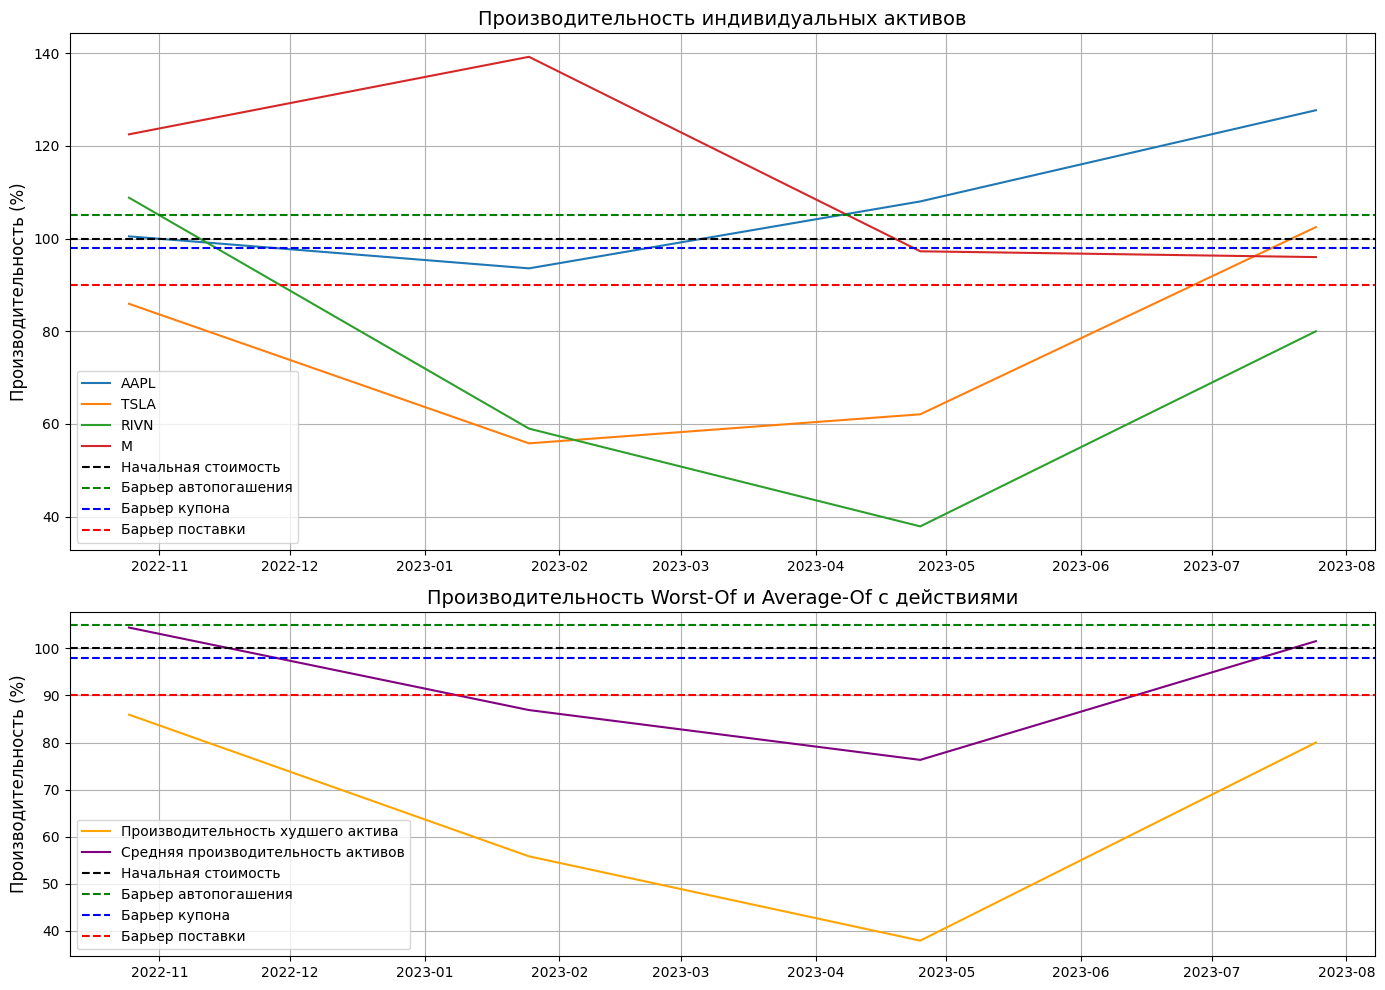

In [21]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), dpi=100, gridspec_kw={'height_ratios': [3, 2]})

ax1 = axes[0]
for asset in assets:
    ax1.plot(performance_df.index, performance_df[f'{asset}_Perf'] * 100, label=asset)
ax1.axhline(100, color='black', linestyle='--', label='Начальная стоимость')
ax1.axhline(autocall_barrier * 100, color='green', linestyle='--', label='Барьер автопогашения')
ax1.axhline(coupon_barrier * 100, color='blue', linestyle='--', label='Барьер купона')
ax1.axhline(delivery_barrier * 100, color='red', linestyle='--', label='Барьер поставки')

ax1.set_title("Производительность индивидуальных активов", fontsize=14)
ax1.set_ylabel("Производительность (%)", fontsize=12)
ax1.legend()
ax1.grid()

ax2 = axes[1]
ax2.plot(performance_df.index, performance_df['Worst_Perf'] * 100, label='Производительность худшего актива', color='orange')
ax2.plot(performance_df.index, performance_df[[f'{asset}_Perf' for asset in assets]].mean(axis=1) * 100, label='Средняя производительность активов', color='purple')

coupon_dates = performance_df.loc[performance_df['Coupon_Paid']].index
autocall_dates = performance_df.loc[performance_df['Early_Redeemed']].index
for date in coupon_dates:
    ax2.scatter(date, coupon_barrier * 100, color='blue', label='Выплата купона' if 'Выплата купона' not in ax2.get_legend_handles_labels()[1] else None)
for date in autocall_dates:
    ax2.scatter(date, autocall_barrier * 100, color='orange', label='Автопогашение' if 'Автопогашение' not in ax2.get_legend_handles_labels()[1] else None)

ax2.axhline(100, color='black', linestyle='--', label='Начальная стоимость')
ax2.axhline(autocall_barrier * 100, color='green', linestyle='--', label='Барьер автопогашения')
ax2.axhline(coupon_barrier * 100, color='blue', linestyle='--', label='Барьер купона')
ax2.axhline(delivery_barrier * 100, color='red', linestyle='--', label='Барьер поставки')

ax2.set_title("Производительность Worst-Of и Average-Of с действиями", fontsize=14)
ax2.set_ylabel("Производительность (%)", fontsize=12)
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()


# Объяснение графиков

## График 1: Производительность индивидуальных активов

На верхнем графике показана динамика производительности каждого из четырёх активов (`AAPL`, `TSLA`, `RIVN`, `M`) в процентах относительно их начальной стоимости (100%). Основные элементы графика:

- **Линии активов**:
  - Каждая линия представляет производительность одного из активов на каждую дату наблюдения.
  - Значения выше 100% указывают на рост стоимости актива, а значения ниже 100% — на снижение.

- **Горизонтальные линии**:
  - **Чёрная линия** (100%): начальная стоимость активов.
  - **Зелёная линия** (105%): барьер автопогашения. Если худший актив превышает этот уровень, опцион погашается досрочно.
  - **Синяя линия** (98%): барьер купона. Купоны выплачиваются, если худший актив выше этого уровня.
  - **Красная линия** (90%): барьер поставки. Если производительность худшего актива опускается ниже этой линии, вместо номинала поставляются активы.

### Интерпретация графика:
- **AAPL** показывает стабильный рост и значительно превышает начальную стоимость.
- **TSLA** и **RIVN** демонстрируют значительное падение в середине периода наблюдений, что снижает шансы на выполнение условий автопогашения.
- **M (Macy's)** остаётся на высоком уровне и пересекает барьер автопогашения, что может привести к досрочному завершению опциона.

---

## График 2: Производительность Worst-Of и Average-Of с действиями

На нижнем графике представлены две ключевые метрики:
1. **Производительность худшего актива (оранжевая линия)**: показывает минимальную производительность среди всех активов в каждую дату наблюдения.
2. **Средняя производительность активов (фиолетовая линия)**: усреднённая производительность всех активов на каждую дату наблюдения.

### Дополнительные элементы графика:
- **События на графике**:
  - **Синие точки**: даты выплаты купонов. Это происходит, если производительность худшего актива (Worst-Of) выше барьера купона (98%).
  - **Оранжевые точки**: даты автопогашения. Это происходит, если производительность худшего актива превышает барьер автопогашения (105%).

- **Горизонтальные линии**:
  - **Чёрная линия** (100%): начальная стоимость активов.
  - **Зелёная линия** (105%): барьер автопогашения.
  - **Синяя линия** (98%): барьер купона.
  - **Красная линия** (90%): барьер поставки.

### Интерпретация графика:
- В первой половине срока опциона производительность худшего актива значительно ниже 100%, что снижает шансы на автопогашение.
- Во второй половине производительность начинает восстанавливаться, но худший актив не достигает уровня 98% (барьер купона).
- **Средняя производительность активов (Average-Of)** остаётся выше худшего актива (Worst-Of), что указывает на то, что падение одного или двух активов значительно влияет на Worst-Of.

---

## Общий вывод
Эти графики наглядно показывают влияние производительности активов на динамику выплат по опциону:
1. **Производительность худшего актива (Worst-Of)** играет ключевую роль в определении, будут ли выплачены купоны или произойдёт автопогашение.
2. Средняя производительность (Average-Of) менее важна для определения выплат, но демонстрирует общий тренд динамики активов.

На основе графиков можно сделать вывод, что:
- **Автопогашение** не произошло, так как худший актив не достиг барьера автопогашения (105%).
- Купоны, скорее всего, не выплачивались в некоторые периоды из-за низкой производительности худшего актива.
- Выплаты на финальной дате будут зависеть от производительности худшего актива относительно барьера поставки (90%).
